# Data Visualization: Earnings Based On College Majors
In this project, we will explore the earnings of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/). FiveThirtyEigth cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

## The dataset  
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries and more. Here are some of the columns in the dataset:  
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.  

Using visualizations, we seek answers to the following questions:  
* Do students in more popular majors earn more?
* How many majors are predominantly male? Predominantly female?
* What is the most common median salary range?
* Which category of majors have the most students?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads=pd.read_csv('recent-grads.csv', delimiter=',')
col_missing_val=[col for col in recent_grads.columns if recent_grads[col].isnull().any()]
print(recent_grads.info())
print('----------------------------------------------------------------------')
print('Columns with missing values:',col_missing_val)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

Columns `Total`, `Men`, `Women`, `ShareWomen` have missing values. We will drop rows containing missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause it to throw errors.

In [2]:
raw_data_count=recent_grads.shape[0] # number of rows before cleaning
recent_grads.dropna(inplace=True)
cleaned_data_count=recent_grads.shape[0]
print('Number of rows before dropping rows containing missing values:', raw_data_count)
print('Number of rows after cleaning:', cleaned_data_count)
recent_grads.info()

Number of rows before dropping rows containing missing values: 173
Number of rows after cleaning: 172
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            1

## Do students in more popular majors earn more?

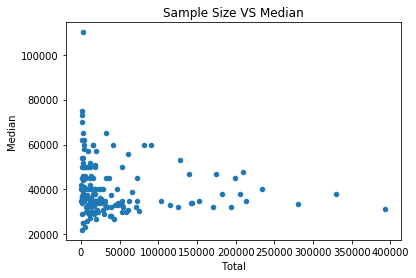

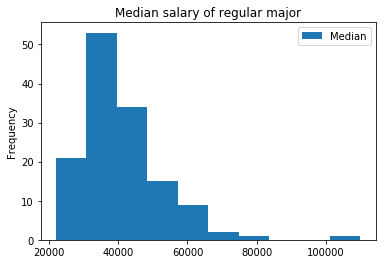

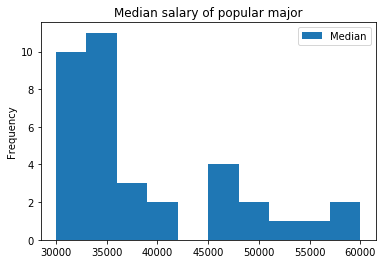

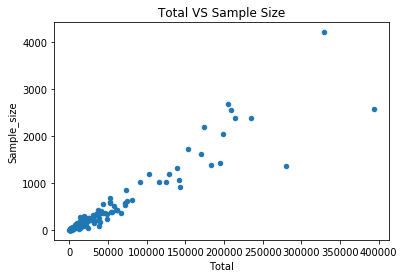

In [3]:
recent_grads.plot(x="Total", y="Median", kind="scatter", title='Sample Size VS Median')
popular_major=recent_grads['Total']>50000
recent_grads[~popular_major].plot(y="Median", kind="hist", title='Median salary of regular major')
recent_grads[popular_major].plot(y='Median', kind="hist", title="Median salary of popular major")
recent_grads.plot(x='Total', y='Sample_size', kind="scatter", title="Total VS Sample Size")

From this plot, we see that the median salary for the most popular major is lower than expected. The salary range for the regular majors are quite large, it varies from 20K to 100K. However, the sample sizes of popular majors are very small in comparison to the total number of students. Therefore, it's not guaranteed that the samples are representative.

## How many majors are predominantly male? Predominantly female?

If the percentage of women is below 50%, the major is predominantly male and vice versa.  
To answer to this question, we will create a histogram with colum `ShareWomen`

Text(0.5, 0, 'ShareWomen(%)')

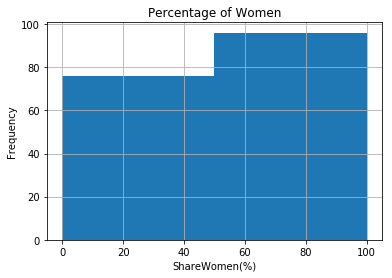

In [4]:
ser_sharewomen=recent_grads['ShareWomen']*100
ax=ser_sharewomen.hist(range=(0,100), bins=2)
ax.set_title("Percentage of Women")
ax.set_ylabel('Frequency')
ax.set_xlabel('ShareWomen(%)')

According to the histogram, almost 80 majors are predominantly male and almost 100 majors are predominantly female.

## Most common median salary range

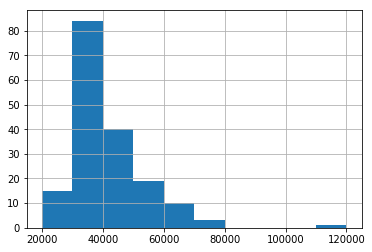

In [5]:
recent_grads['Median'].hist(range=(20000,120000))

The most common median salary range is between 30K-40K. Since this range is quite large, we will look more into it.

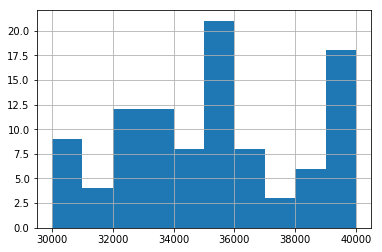

In [6]:
salary_range=recent_grads['Median'].between(30000,40000)
data=recent_grads.loc[salary_range,"Median"]
data.hist()

The most common median salary are between 35K-36K and 39K-40K.
We can also create a scatter matrix plot which allows us to explore the relationship and distribution simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B4305D0F0>,
      dtype=object)

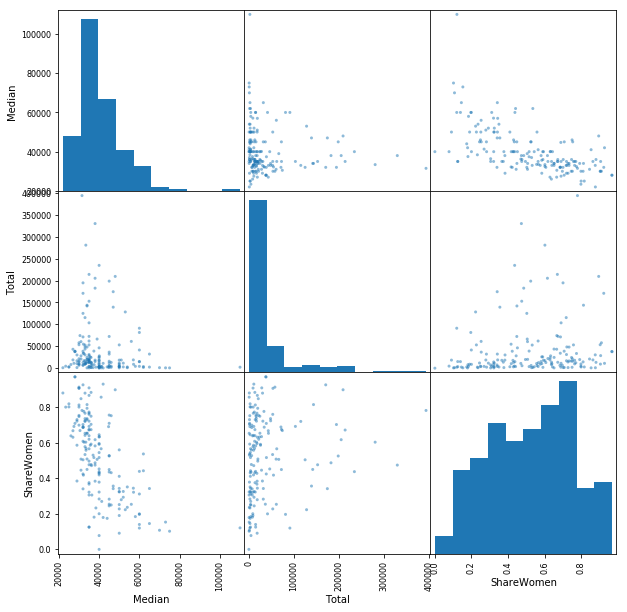

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Median','Total','ShareWomen']], figsize=(10,10))

From this scatter matrix plot, we can also see that students graduated from majors with higher percentage of female seem to earn less than those from majors that are predominantly male.

## Which category of majors have the most students?

Major_category
Agriculture & Natural Resources          75620.0
Arts                                    357130.0
Biology & Life Science                  453862.0
Business                               1302376.0
Communications & Journalism             392601.0
Computers & Mathematics                 299008.0
Education                               559129.0
Engineering                             537583.0
Health                                  463230.0
Humanities & Liberal Arts               713468.0
Industrial Arts & Consumer Services     229792.0
Interdisciplinary                        12296.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Name: Total, dtype: float64 

Number of categories: 16


<BarContainer object of 16 artists>

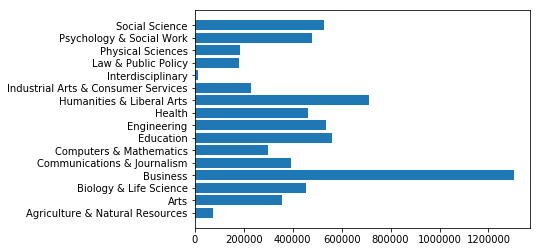

In [38]:
major_cat=recent_grads.groupby('Major_category')['Total'].sum()
print(major_cat,"\n")
print("Number of categories:", major_cat.size)
plt.barh(major_cat.index, major_cat)

There are 16 categories in total. "Business" majors attract the most students.

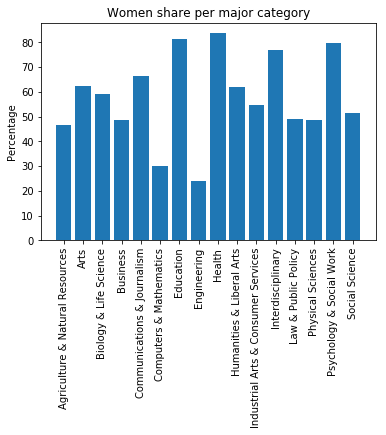

In [52]:
women=recent_grads.groupby('Major_category').sum()['Women']
tot=recent_grads.groupby('Major_category').sum()['Total']
women_share=(women/tot)*100
plt.bar(women_share.index, women_share)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Women share per major category')
plt.show()

'Engineering' and 'Computers & Mathematics' majors are less attractive to women.

# Conclusion
From this data visualization exercise, we observed that:
* The most popular majors are not necessary those result in the highest salary.  
* The most common median salary range for recent grads are 35K-36K and 39K-40K.  
* Students graduated from majors with higher percentage of women seem to earn less than those from majors that are predominantly male.  